Consider the following unconstrained optimization problem.

$ \text{min} \quad \frac{1}{3}x_1^6 - 2.1x_1^4+4x_2^4+4(x_1^2-x_2^2)+x_1x_2$

$ \text{Sub.to} \quad \mathbf{x} \in \mathcal{R}^2 $

Obtain the minima of the optimization problem using the Gradient Descent method (with a fixed step size of 0.1) and Newton's method. Use the initial point as $\mathbf{x}^0 = [1,-1]^T$

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

defining function

In [2]:
f = lambda x1,x2 : (1/3)*(x1**6) - 2.1*(x1**4) + 4*(x2**4) + 4*(x1**2 - x2**2) + x1*x2

Gradient Descent method (with a fixed step size of 0.1)

In [3]:
# defining initial point
x_grad = np.array([1.,-1.])

In [4]:
# defining gradient of f(x)
f_ = lambda x1,x2 : np.array([2*(x1**5) - 8.4*(x1**3) + 8*x1 + x2,16*(x2**3) - 8*x2 + x1])

In [5]:
# defining step size and epsilon
esp = 1e-6
alpha = 0.1

In [6]:
# Gradient descent algorithm
x_grad_pt = [x_grad]
fx_grad = [f(x_grad[0],x_grad[1])]
while np.linalg.norm(f_(x_grad[0],x_grad[1])) > esp:
  x_grad = x_grad - alpha * f_(x_grad[0],x_grad[1])
  x_grad_pt.append(x_grad)
  fx_grad.append(f(x_grad[0],x_grad[1]))

In [7]:
print(f'The minima of the optimization problem using the Gradient Descent method is {x_grad} ')

The minima of the optimization problem using the Gradient Descent method is [ 0.08984201 -0.71265645] 


In [8]:
print(f'The minimum value of the optimization problem using the Gradient Descent method is {f(x_grad[0],x_grad[1])} ')

The minimum value of the optimization problem using the Gradient Descent method is -1.0316284534898608 


In [9]:
x1_vals = np.linspace(-1.6, 1.6, 100)
x2_vals = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1_vals, x2_vals)
z = f(x1, x2)

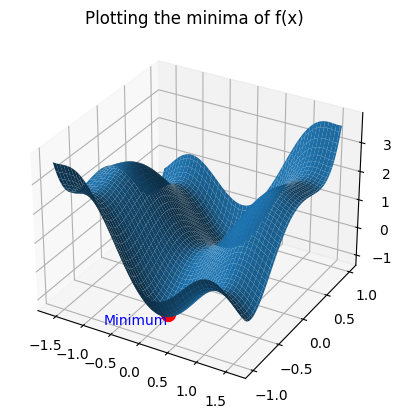

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_grad[0], x_grad[1], f(x_grad[0], x_grad[1]), color='red', s=100)
ax.plot_surface(x1, x2, z)
ax.text(x_grad[0], x_grad[1],f(x_grad[0], x_grad[1]), 'Minimum', color='blue', fontsize=10, ha='right', va='top')
plt.title('Plotting the minima of f(x)')
plt.savefig('fig/1Q_gradient.png')
plt.show()

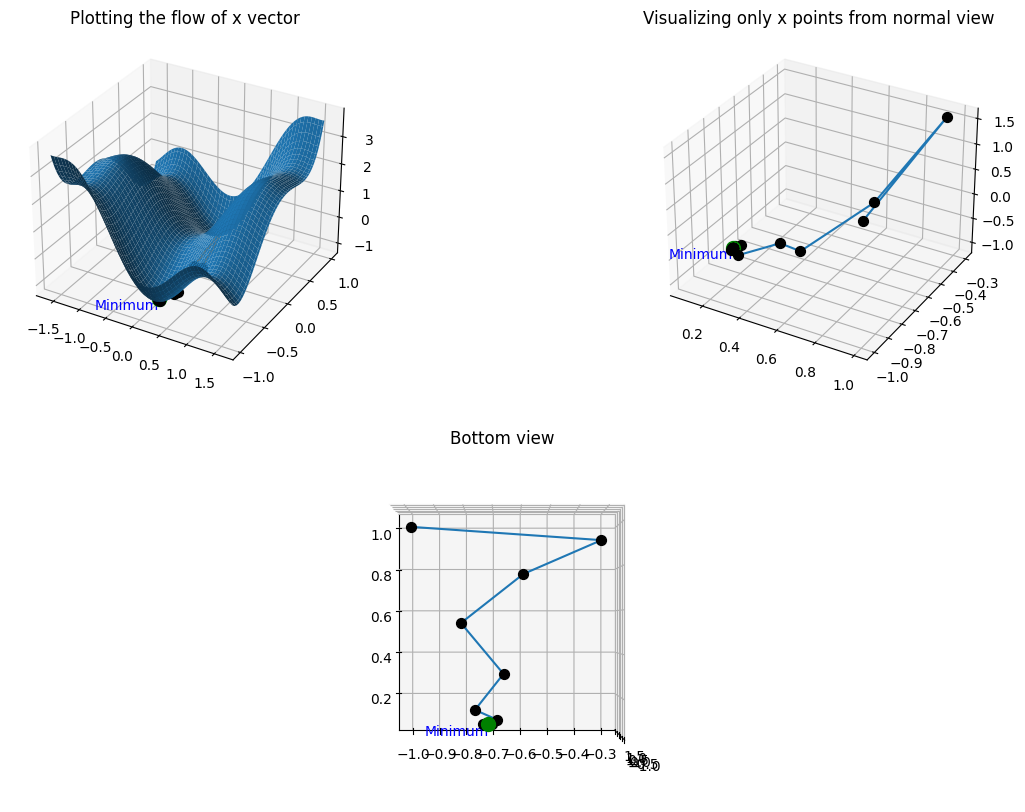

In [11]:
# visualization of plots in different views
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221, projection='3d')
for point in x_grad_pt:
  ax1.scatter(point[0], point[1], f(point[0], point[1]), color='black', s=50)
ax1.plot_surface(x1, x2, z)
ax1.plot(*tuple(zip(*x_grad_pt)), fx_grad)
ax1.scatter(x_grad[0], x_grad[1], f(x_grad[0], x_grad[1]), color='green', s=100)
ax1.set_title('Plotting the flow of x vector')
ax1.text(x_grad[0], x_grad[1],f(x_grad[0], x_grad[1]), 'Minimum', color='blue', fontsize=10, ha='right', va='top')

ax2 = fig.add_subplot(222,projection='3d')
for point in x_grad_pt:
  ax2.scatter(point[0], point[1], f(point[0], point[1]), color='black', s=50)
ax2.plot(*tuple(zip(*x_grad_pt)), fx_grad)
ax2.scatter(x_grad[0], x_grad[1], f(x_grad[0], x_grad[1]), color='green', s=100)
ax2.set_title('Visualizing only x points from normal view')
ax2.text(x_grad[0], x_grad[1],f(x_grad[0], x_grad[1]), 'Minimum', color='blue', fontsize=10, ha='right', va='top')

ax3 = fig.add_subplot(212,projection='3d')
for point in x_grad_pt:
  ax3.scatter(point[0], point[1], f(point[0], point[1]), color='black', s=50)
ax3.scatter(x_grad[0], x_grad[1], f(x_grad[0], x_grad[1]), color='green', s=100)
ax3.plot(*tuple(zip(*x_grad_pt)), fx_grad)
ax3.view_init(elev=-90, azim=0)
ax3.set_title('Bottom view')
ax3.text(x_grad[0], x_grad[1],f(x_grad[0], x_grad[1]), 'Minimum', color='blue', fontsize=10, ha='right', va='top')

plt.savefig('fig/1Q_flow.png')
plt.show()

 Newton's method

In [12]:
# defining initial point
x_new = np.array([1.,-1.])

In [13]:
# defining hessian of f(x)
f__ = lambda x1,x2 : np.array([[10*(x1**4) - 25.2*(x1**2) + 8, 1],[1, 48*(x2**2) - 8]])

In [14]:
# Newtons algorithm
x_new_pt = [x_new]
fx_new = [f(x_new[0],x_new[1])]
while np.linalg.norm(f_(x_new[0],x_new[1])) > esp:
  x_new = x_new - (np.linalg.inv(f__(x_new[0],x_new[1]))@f_(x_new[0],x_new[1]))
  x_new_pt.append(x_new)
  fx_new.append(f(x_new[0],x_new[1]))

In [15]:
print(f'The minima of the optimization problem using the Newton\'s method is {x_new} ')

The minima of the optimization problem using the Newton's method is [ 1.10920534 -0.7682681 ] 


In [16]:
print(f'The minimum value of the optimization problem using the Gradient Descent method is {f(x_new[0],x_new[1])} ')

The minimum value of the optimization problem using the Gradient Descent method is 0.543718600978185 


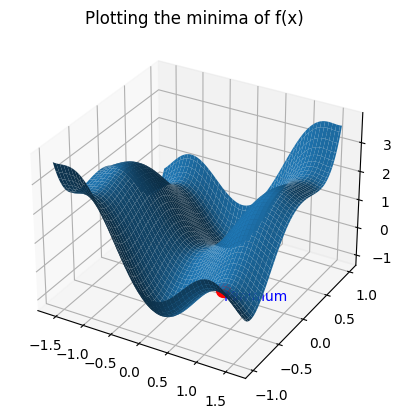

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_new[0], x_new[1], f(x_new[0], x_new[1]), color='red', s=100)
ax.plot_surface(x1, x2, z)
ax.text(x_new[0], x_new[1],f(x_new[0], x_new[1]), 'Minimum', color='blue', fontsize=10, ha='left', va='top')
plt.title('Plotting the minima of f(x)')
plt.savefig('fig/2Q_newton.png')
plt.show()

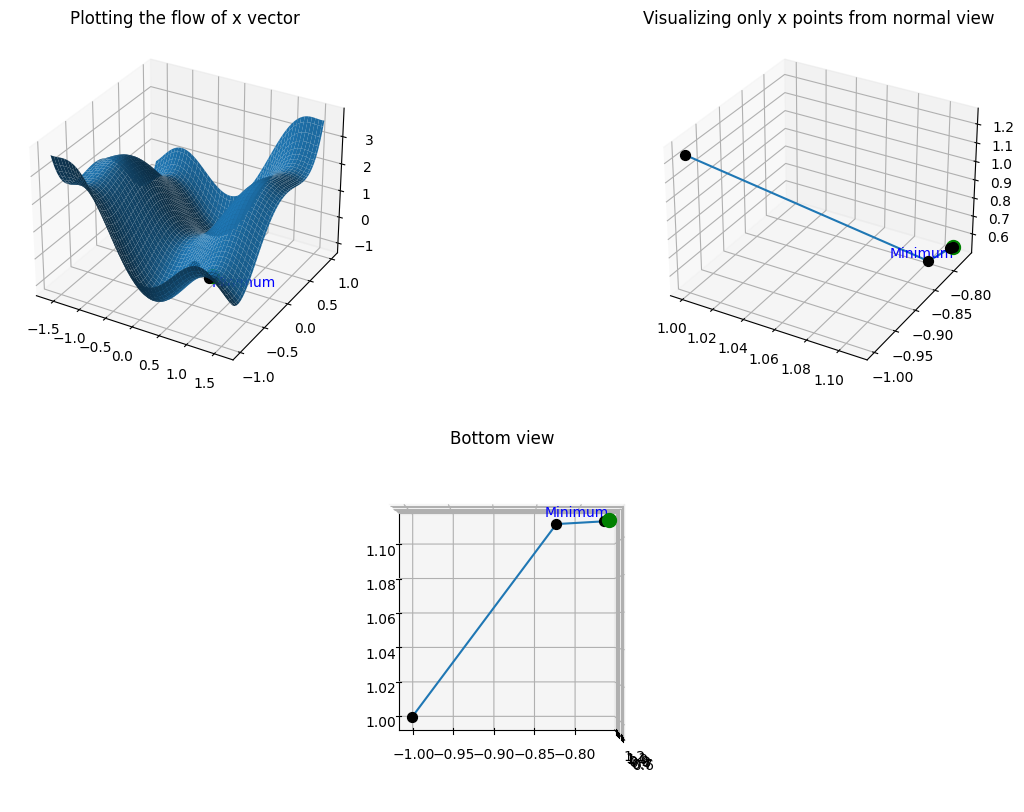

In [18]:
# visualization of plots in different views
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221, projection='3d')
for point in x_new_pt:
  ax1.scatter(point[0], point[1], f(point[0], point[1]), color='black', s=50)
ax1.plot_surface(x1, x2, z)
ax1.plot(*tuple(zip(*x_new_pt)), fx_new)
ax1.scatter(x_new[0], x_new[1], f(x_new[0], x_new[1]), color='green', s=100)
ax1.set_title('Plotting the flow of x vector')
ax1.text(x_new[0], x_new[1],f(x_new[0], x_new[1]), 'Minimum', color='blue', fontsize=10, ha='left', va='top')

ax2 = fig.add_subplot(222,projection='3d')
for point in x_new_pt:
  ax2.scatter(point[0], point[1], f(point[0], point[1]), color='black', s=50)
ax2.plot(*tuple(zip(*x_new_pt)), fx_new)
ax2.scatter(x_new[0], x_new[1], f(x_new[0], x_new[1]), color='green', s=100)
ax2.set_title('Visualizing only x points from normal view')
ax2.text(x_new[0], x_new[1],f(x_new[0], x_new[1]), 'Minimum', color='blue', fontsize=10, ha='right', va='top')

ax3 = fig.add_subplot(212,projection='3d')
for point in x_new_pt:
  ax3.scatter(point[0], point[1], f(point[0], point[1]), color='black', s=50)
ax3.scatter(x_new[0], x_new[1], f(x_new[0], x_new[1]), color='green', s=100)
ax3.plot(*tuple(zip(*x_new_pt)), fx_new)
ax3.view_init(elev=-90, azim=0)
ax3.set_title('Bottom view')
ax3.text(x_new[0], x_new[1],f(x_new[0], x_new[1]), 'Minimum', color='blue', fontsize=10, ha='right', va='bottom')

plt.savefig('fig/2Q_flow.png')
plt.show()